In [12]:
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import numpy as np


SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


from matplotlib import rcParams
rcParams['font.family'] = 'serif'

path = "esps/butane/"
files = [x for x in os.listdir(path) if x.__contains__(".esp")]
files.sort()
files.remove("scan_6.esp")
files.remove("scan_7.esp")
files.remove("scan_9.esp")
files.remove("scan_8.esp")

[1.460027982, 1.55884749, 1.743778404, 1.771339138, 1.804421871]


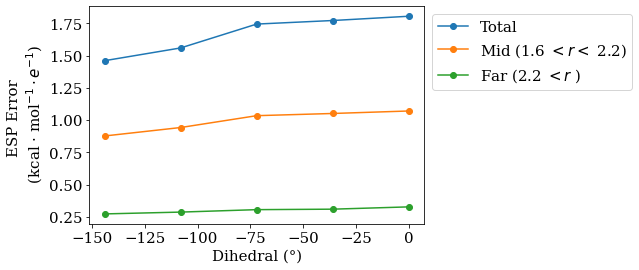

In [30]:
rmse_max = []
rmse_max_close = []
rmse_max_mid = []
rmse_max_far = []

for i in range(len(files)):
    f = open(path+files[i]).readlines()
    for x in [f[-5]]:
        rmse_max.append(float(x.split()[1]))
    for x in [f[-4]]:
        rmse_max_close.append(float(x.split()[8]))
    for x in [f[-3]]:
        rmse_max_mid.append(float(x.split()[7]))
    for x in [f[-2]]:
        rmse_max_far.append(float(x.split()[5]))
        
print(rmse_max)       
angles = []

plt.plot([-144, -108, -72, -36, 0], rmse_max, 'o-', label="Total")
#plt.plot([-144, -108, -72, -36, 0], rmse_max_close, 'o-', label="Close (1.2 $< r <$ 1.6)")
plt.plot([-144, -108, -72, -36, 0], rmse_max_mid, 'o-', label="Mid (1.6 $< r <$ 2.2)")
plt.plot([-144, -108, -72, -36, 0], rmse_max_far, 'o-', label="Far (2.2 $< r$ )")
plt.ylabel("ESP Error \n (kcal $\cdot$ mol$^{-1}\cdot e^{-1}$)")
plt.xlabel("Dihedral (°)")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("butane_ESP_error.png", bbox_inches="tight")